In [4]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [3]:
class linear_regression() :
  #initiating the hyperparameters
  def __init__(self,learning_rate, noofiterations):
      self.learning_rate = learning_rate
      self.noofiterations = noofiterations
  #fitting data to model
  def fit(self,x,y):
    #self is the instance
    #number of training examples(m) and number of features(n)
    self.m, self.n = x.shape
    #inititaing weight and bias
    self.w = np.zeros(self.n) # matrix of n cols containing 0s
    self.b = 0
    self.x = x
    self.y = y
    #implementing gradient descent
    for i in range(self.noofiterations):
      self.update_weights()

  def update_weights(self,):
    y_pred = self.predict(self.x)

    #gradients
    dw = -(2*(self.x.T).dot(self.y - y_pred))/self.m
    db = -2*np.sum(self.y - y_pred)/self.m
    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  def predict(self,x):
    return x.dot(self.w) + self.b

In [6]:
model = linear_regression(0.7,100)

In [9]:
df = pd.read_csv('/content/salary_data.csv')

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
df.shape

(30, 2)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [15]:
x = df.iloc[:,:-1] #all cols except the last one
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [16]:
y = df.iloc[:,-1] #only the last col
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

(21, 1)
(9, 1)
(21,)
(9,)
(30, 2)


In [38]:
model = linear_regression(0.02,10000)

In [39]:
model.fit(x_train,y_train)

In [40]:
#printing the parameter values
print("weight = ",model.w[0])
print("bias = ",model.b)

weight =  9532.83553603681
bias =  23750.93556359476


<ipython-input-40-08468b6efe59>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("weight = ",model.w[0])


In [41]:
#testing the model
test_prediction = model.predict(x_test)

In [42]:
test_prediction

,0
1,36143.621760
0,34237.054653
14,66648.695476
9,59022.427047
21,91434.067869
19,80947.948780
23,101920.186959
6,52349.442172
3,42816.606636


In [43]:

from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(test_prediction,y_test)
print(mse)

6974.465965919068


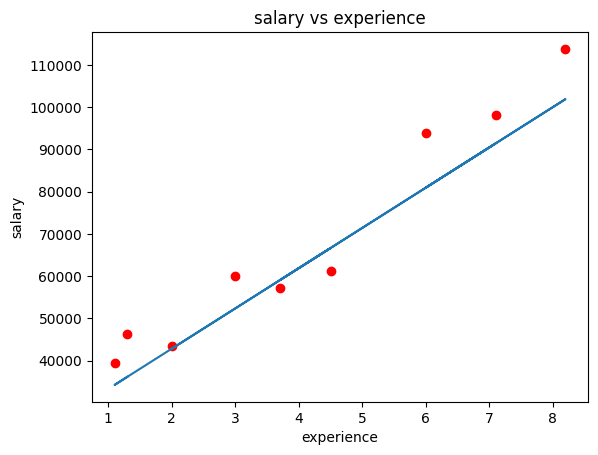

In [44]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,test_prediction)
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()

IMPLEMENTING LINEAR REGRESSION USING BUILT IN LIBRARIES


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train);


In [46]:
model.intercept_

np.float64(23750.93556359499)

In [47]:
model.coef_

array([9532.83553604])

In [48]:
new_y_pred = model.predict(x_test)

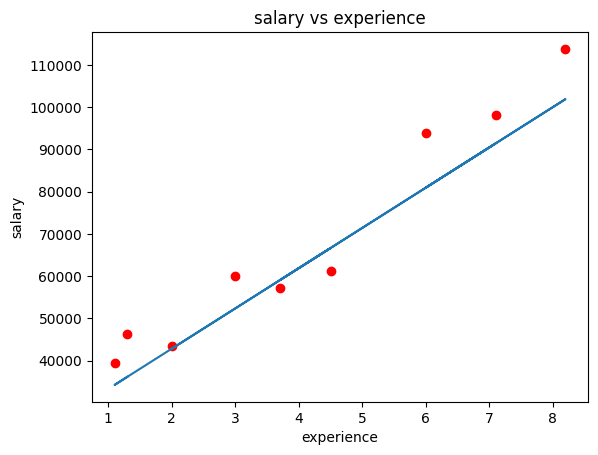

In [49]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,new_y_pred)
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()